https://www.hackerrank.com/challenges/dota2prediction/problem

Gabe and his 9 friends enjoy playing a video game called Defence of the Ancients. This game consists of two 5-player teams fighting each other on a virtual battlefield.

Before the game starts, each player picks a virtual hero as their character from a pool of about 100 heroes. Each hero can only be picked by one player in a game. Gabe and his friends are very similar in skill-level, so the outcome of their games has some dependence on which heroes were chosen. Gabe wonders if he can predict the outcome of a game based on what heroes have been picked.

*** Game Data ***

Gabe has extensive records of past games between similar players. You can download this training data with the results of 15,000 games that Gabe has already played. You need to analyze the data to find trends about each hero. Hero names contain spaces, apostrophes, and hyphens.

The data consists of 15,000 lines, each with 10 strings and one number all seperated by commas. On each line, the first 5 strings are the heroes picked by team 1, the second 5 strings are the heroes picked by the team 2, and the number at the end is the number of the team who won.

*** Challenge ***

In each of K games, you will be given the heroes picked by each team. Using the training data, can you predict which team will win based on the heroes that they have picked? You will be scored based on how many predictions you get right. You may access the trainingdata by reading from the file "trainingdata.txt".

*** Input ***

The first line will contain a single integer K, the number of games you need to predict. This is followed by K lines containing 10 comma separated strings of the 10 chosen heroes.

*** Output ***

For each game, output the number (1 or 2) of the team you think will win on a new line.

*** Constraints ***

1 ≤ K ≤ 3000

*** Sample Input ***

5

Spectre,Nature's Prophet,Ogre Magi,Nyx Assassin,Kunkka,Lone Druid,Windrunner,Disruptor,Juggernaut,Naga Siren

Windrunner,Medusa,Zeus,Shadow Fiend,Troll Warlord,Bounty Hunter,Pudge,Lycanthrope,Riki,Pugna

Ogre Magi,Sniper,Rubick,Lifestealer,Treant Protector,Slardar,Lion,Shadow Fiend,Weaver,Nature's Prophet

Sniper,Nyx Assassin,Lich,Axe,Necrolyte,Magnus,Juggernaut,Dazzle,Tinker,Nature's Prophet

Lina,Nature's Prophet,Chaos Knight,Gyrocopter,Invoker,Sven,Broodmother,Necrolyte,Undying,Windrunner


*** Sample Output ***

1
1
1
1
1

*** Scoring ***

Your score for this challenge will based on what percentage of your predictions are correct, according to this formula:

Score = 100 * ((#correct - #incorrect) / total)

If you are are correct for less than half the games, you will receive a score of 0. Your score will only be based on the second (hidden) test case. The sample test case is just for checking if your program is working as intended in our environment.

In [3]:
%matplotlib inline

In [4]:
class Vocabulary(object):
    def __init__(self):
        self.vocab = {}
        self.len = 0
    
    def add (self,word):
        if word in self.vocab:
            return
        
        self.vocab[word] = self.len
        self.len += 1
        
    def isIn(self, word):
        return word in self.vocab
        
    def get_index ( self, word ):
        return self.vocab[word]
    
    def get_word ( self, index ) :
        if 'invert' not in self.__dict__:
            self.invert = dict((v,k) for k, v in self.vocab.items())
        return self.invert[index]
        
vocab = Vocabulary()


In [5]:
with open('trainingdata.txt', 'r') as fh:
    lines = fh.readlines()
    
    matches = []
    
    # Phantom Lancer,Chaos Knight,Warlock,Venomancer,Batrider,Ogre Magi,Clinkz,Anti-Mage,Ursa,Bane,1
    for line in lines:
        parts = line.split(',')
        
        for word in parts[:10]:
            vocab.add(word)
            
        team_1 = [vocab.get_index(word) for word in parts[:5]]
        team_2 = [vocab.get_index(word) for word in parts[5:10]]
        result = int(parts[10])
        
        matches.append((team_1, team_2, result))

In [6]:
matches[120]

([5, 76, 32, 68, 82], [21, 29, 24, 16, 54], 2)

In [7]:
# Ranking different kinds of features
# By calculating mutual information for each feature

# Single features
# Simple, just using sklearn to select single features
# A 2x|V| vector is created, as two one-hot vector concatenation


# Binary features
# Create binary features, and then using sklearn to select features

In [8]:
len(matches)

15000

In [9]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif

In [10]:
from sklearn.feature_selection import SelectKBest

In [11]:
X = np.zeros((len(matches), vocab.len ))
Y = np.zeros(len(matches))

In [12]:
for i, match in enumerate(matches):
    team_1, team_2, result = match
    for v in team_1:
        X[i][v] = 1
    for v in team_2:
        X[i][v] = -1
    Y[i] = result-1

Let's blindly apply some machine learning algorithm out of the box, to see how well they perform on this problem.

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

** Logistic regression **

In [14]:
from sklearn.linear_model import LogisticRegression
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.602066666667


** Linear Discriminant Analysis **

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

C:\Anaconda3\envs\tensorflow-cpu\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda3\envs\tensorflow-cpu\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda3\envs\tensorflow-cpu\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda3\envs\tensorflow-cpu\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda3\envs\tensorflow-cpu\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda3\envs\tensorflow-cpu\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("V

0.602


C:\Anaconda3\envs\tensorflow-cpu\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Anaconda3\envs\tensorflow-cpu\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Note that there are a lots of *collinear warning* when we trained with LDA. As far as the performance goes, we can see that the performance of these two methods are pretty close.

** K-nearest neighbors **

In [16]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

KeyboardInterrupt: 

The problem with K-nearest neighbors is obviously the curse of dimensionality, we have a very high number of dimension here, so the distance between any two data points is nearly the same everywhere. Moreover, as our data is binary, K-nearest neighbor is not really a good choice anyway.

** Naive Bayes ** 

In [404]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.567266666667


In [407]:
model.fit(X, Y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Again we achive a performance comparable to LR and LDA.

** SVM **

In [131]:
from sklearn.svm import SVC
model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.594533333333


** Bagged decision tree ** 

We would also try an ensemble method employing decision tree as base estimator. 

In [134]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

cart = DecisionTreeClassifier(criterion = 'entropy')
num_trees = 10
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7, max_samples = 0.5, max_features=0.5)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.533466666667


In [ ]:
logistic_coef = [ 0.81677673,  0.57499219,  0.45694456,  0.34542858,  0.35697136,
         0.25042017,  0.28351395,  0.2347544 ,  0.20150746,  0.18919355,
         0.22454607,  0.22966371,  0.229111  ,  0.20464181,  0.18805431,
        -0.22979506, -0.20754391, -0.22435342, -0.21644672, -0.26578194,
        -0.23921589, -0.3082163 , -0.30379924, -0.30825253, -0.35380314,
        -0.30692574, -0.35971862, -0.38457256, -0.41606547, -0.45076123,
        -0.73790523, -0.63810305, -0.50621481, -0.49943388, -0.40936881,
        -0.30463815, -0.28971389, -0.31520699, -0.28108395, -0.27297841,
        -0.23743515, -0.23468561, -0.20902621, -0.24810791, -0.2058793 ,
         0.18931256,  0.21837809,  0.19669076,  0.23303521,  0.26475739,
         0.24176284,  0.25048168,  0.2001663 ,  0.31128437,  0.25171945,
         0.25122132,  0.32045726,  0.37789383,  0.44938722,  0.50260205]

logistic_intercept = -0.02959285

vocab = {'Alchemist': 8,
  'Ancient Apparition': 77,
  'Anti-Mage': 7,
  'Axe': 90,
  'Bane': 38,
  'Batrider': 65,
  'Beastmaster': 67,
  'Bloodseeker': 88,
  'Bounty Hunter': 54,
  'Brewmaster': 48,
  'Broodmother': 31,
  'Centaur Warrunner': 29,
  'Chaos Knight': 66,
  'Chen': 61,
  'Clinkz': 74,
  'Clockwerk': 3,
  'Crystal Maiden': 45,
  'Dark Seer': 47,
  'Dazzle': 58,
  'Death Prophet': 84,
  'Disruptor': 50,
  'Doom': 56,
  'Dragon Knight': 80,
  'Drow Ranger': 34,
  'Earthshaker': 55,
  'Enchantress': 85,
  'Enigma': 53,
  'Faceless Void': 27,
  'Gyrocopter': 6,
  'Huskar': 57,
  'Invoker': 5,
  'Jakiro': 73,
  'Juggernaut': 51,
  'Keeper of the Light': 23,
  'Kunkka': 36,
  'Leshrac': 13,
  'Lich': 86,
  'Lifestealer': 82,
  'Lina': 46,
  'Lion': 64,
  'Lone Druid': 1,
  'Luna': 69,
  'Lycanthrope': 93,
  'Magnus': 22,
  'Medusa': 94,
  'Meepo': 42,
  'Mirana': 20,
  'Morphling': 43,
  'Naga Siren': 59,
  "Nature's Prophet": 60,
  'Necrolyte': 18,
  'Night Stalker': 96,
  'Nyx Assassin': 14,
  'Ogre Magi': 49,
  'Omniknight': 44,
  'Outworld Devourer': 87,
  'Phantom Assassin': 75,
  'Phantom Lancer': 70,
  'Puck': 12,
  'Pudge': 21,
  'Pugna': 91,
  'Queen of Pain': 26,
  'Razor': 35,
  'Riki': 10,
  'Rubick': 24,
  'Sand King': 16,
  'Shadow Demon': 95,
  'Shadow Fiend': 76,
  'Shadow Shaman': 4,
  'Silencer': 41,
  'Skeleton King': 81,
  'Slardar': 15,
  'Slark': 9,
  'Sniper': 28,
  'Spectre': 17,
  'Spirit Breaker': 89,
  'Storm Spirit': 72,
  'Sven': 0,
  'Templar Assassin': 79,
  'Tidehunter': 25,
  'Timbersaw': 40,
  'Tinker': 11,
  'Tiny': 52,
  'Treant Protector': 30,
  'Troll Warlord': 33,
  'Undying': 83,
  'Ursa': 62,
  'Vengeful Spirit': 92,
  'Venomancer': 2,
  'Viper': 78,
  'Visage': 39,
  'Warlock': 19,
  'Weaver': 32,
  'Windrunner': 68,
  'Wisp': 63,
  'Witch Doctor': 71,
  'Zeus': 37}

f_for_first = dict((k, i) for i, k in enumerate([42, 40, 94, 31, 7, 75, 43, 8, 52, 5, 87, 57, 79, 1, 28, 16, 29, 96, 86, 73, 33, 89, 92, 37, 23, 70, 34, 14, 19, 69]))
f_for_second = dict((k, i) for i, k in enumerate([42, 31, 94, 75, 43, 40, 85, 8, 5, 7, 28, 74, 90, 56, 59, 9, 62, 23, 86, 3, 63, 92, 69, 29, 89, 70, 37, 19, 39, 14]))

lines = sys.stdin.readlines()

for line in lines[1:]:
    parts = line.strip().split(',')
    
    team_1 = [vocab[word] for word in parts[:5]]
    team_2 = [vocab[word] for word in parts[5:10]]
    
    u_1 = []
    u_2 = []
    
    for q in team_1:
        if q in f_for_first:
            u_1.append(f_for_first[q])
    
    for q in team_2:
        if q in f_for_second:
            u_2.append(f_for_second[q])
    
    t = logistic_intercept
    for q in u_1:
        t += logistic_coef[q] 
    
    for q in u_2:
        t += logistic_coef[q + 30] 
    
    if t > 0:
        print (1)
    else:
        print (2)

The performance is, not suprisingly, bad. The reason would be explained a little bit later. 

So far, our performance has been mediocre. We can see one of the problem is that our data has two many dimensions, a few things we can do to improve it:

- Reduce number of dimensions by feature selection methods

- Reduce number of dimensions by data reduction techniques.

** Univariate selection **

This is a principle in feature selection, basically saying that you should consider each feature's predictive power independently. Therefore, we would test statistic significance of a feature regarding to predicting labels.

In [137]:
s = SelectKBest(mutual_info_classif, k = 40)
s.fit(X, Y)

SelectKBest(k=40,
      score_func=<function mutual_info_classif at 0x000001EEDEBE6F28>)

In [138]:
X_r = s.transform(X)

Let's try this transformed data with Logistic regression

In [139]:
model = LogisticRegression()
results = cross_val_score(model, X_r, Y, cv=kfold)
print(results.mean())

0.535666666667


What, why is that? We hope that the performance would be improved, but in fact, it is even worse.

In [81]:
t = s.get_support()

In [82]:
for v in np.argwhere(t == True).flatten():
    if v < vocab.len:
        print ('Feature for first side ' + str(v) + ' ' + vocab.get_word(v))
    else:
        print ('Feature for second side ' + str(v) + ' ' + vocab.get_word(v - vocab.len))

Feature for first side 2 Venomancer
Feature for first side 3 Clockwerk
Feature for first side 5 Invoker
Feature for first side 11 Tinker
Feature for first side 17 Spectre
Feature for first side 23 Keeper of the Light
Feature for first side 65 Batrider
Feature for first side 72 Storm Spirit
Feature for first side 81 Skeleton King
Feature for first side 86 Lich
Feature for first side 87 Outworld Devourer
Feature for first side 91 Pugna
Feature for second side 120 Keeper of the Light
Feature for second side 122 Tidehunter
Feature for second side 127 Treant Protector
Feature for second side 131 Drow Ranger
Feature for second side 141 Omniknight
Feature for second side 150 Enigma
Feature for second side 178 Skeleton King
Feature for second side 184 Outworld Devourer


In [19]:
def stat_for_feature(v):
    # Count number of times this feature appears in the team, number of win
    total = 0
    win = 0
    
    for i, match in enumerate(matches):
        team_1, team_2, result = match
        
        if v < vocab.len:
            # First side
            team = team_1
            d = 1
            f = vocab.get_word(v)
            included = v in team
        else:
            team = team_2
            d = 2
            f = vocab.get_word(v - vocab.len)
            included =  v - vocab.len in team
        
        if included:
            total += 1
        
            if result == 1 and v < vocab.len:
                win += 1
            if result == 2 and v >= vocab.len: 
                win += 1
    # print ('Total number of match that team %d picks %s = %d, number of wins = %d, percentage = %.1f%%' % (d, f, total, win, win*100/total))
    return total, win

Let do a double check on the feature. We know that a hero is good if most of the time we have that hero in our team, we won and vice versa. So let's do a check on a few heroes we have here.

Let's start with Venomancer, indexed at 2.

In [20]:
total, win = stat_for_feature(11)
print ('Total number of match that team %d picks %s = %d, number of wins = %d, percentage = %.1f%%' % (1, 'Tinker', total, win, win*100/total))

Total number of match that team 1 picks Tinker = 690, number of wins = 348, percentage = 50.4%


Wait, what. There seems to be no correlation between using of this hero with the winning percentage, why it even shows up here.

It turned out that when the mutual information is calculated, you actually account for both label of the feature, so mutual information encompasses the information you gain when the feature is **missing**. That is probably not a good indicator, so I think we should use win the winning percentage as quality indicator of features.

In [21]:
features_for_first_team = []
for i in range(vocab.len):
    total, win = stat_for_feature(i)
    features_for_first_team.append((i, total, win))

In [22]:
features_for_second_team = []
for i in range(vocab.len, 2 * vocab.len):
    total, win = stat_for_feature(i)
    features_for_second_team.append((i- vocab.len, total, win))

Let's calculate the correlation between two variables, the first variable is the possibility of winning (strength) of each hero for the first team, and the second variable is for the second team.

In [23]:
v1 = [win/total for _, total, win in features_for_first_team]
v2 = [win/total for _, total, win in features_for_second_team]
np.corrcoef(np.array([v1, v2]))

array([[ 1.        ,  0.86688668],
       [ 0.86688668,  1.        ]])

P(v1, v2) =  0.9896633. They are highly correlated.

In [24]:
features_for_first_team = sorted(features_for_first_team, key = lambda a : a[2] / a[1])
features_for_second_team= sorted(features_for_second_team, key = lambda a : a[2] / a[1])

20 best predictors for first team

In [25]:
for i, total, win in features_for_first_team[:10] + features_for_first_team[-10:]:
    print ('Feature = %s, winning percentage = %.1f%%' % (vocab.get_word(i), win*100/total))

Feature = Meepo, winning percentage = 32.6%
Feature = Timbersaw, winning percentage = 38.4%
Feature = Medusa, winning percentage = 41.6%
Feature = Broodmother, winning percentage = 43.7%
Feature = Anti-Mage, winning percentage = 44.4%
Feature = Phantom Assassin, winning percentage = 45.4%
Feature = Morphling, winning percentage = 45.4%
Feature = Alchemist, winning percentage = 46.0%
Feature = Tiny, winning percentage = 47.1%
Feature = Invoker, winning percentage = 47.3%
Feature = Troll Warlord, winning percentage = 57.5%
Feature = Spirit Breaker, winning percentage = 58.8%
Feature = Vengeful Spirit, winning percentage = 59.0%
Feature = Zeus, winning percentage = 59.5%
Feature = Keeper of the Light, winning percentage = 60.0%
Feature = Phantom Lancer, winning percentage = 60.4%
Feature = Drow Ranger, winning percentage = 60.6%
Feature = Nyx Assassin, winning percentage = 61.2%
Feature = Warlock, winning percentage = 62.1%
Feature = Luna, winning percentage = 62.4%


20 best predictors for second team

In [26]:
for i, total, win in features_for_second_team[:10] + features_for_second_team[-10:]:
    print ('Feature = %s, winning percentage = %.1f%%' % (vocab.get_word(i), win*100/total))

Feature = Meepo, winning percentage = 31.6%
Feature = Broodmother, winning percentage = 32.9%
Feature = Medusa, winning percentage = 35.7%
Feature = Phantom Assassin, winning percentage = 37.1%
Feature = Morphling, winning percentage = 39.5%
Feature = Timbersaw, winning percentage = 39.9%
Feature = Enchantress, winning percentage = 40.2%
Feature = Alchemist, winning percentage = 40.5%
Feature = Invoker, winning percentage = 40.8%
Feature = Anti-Mage, winning percentage = 41.8%
Feature = Wisp, winning percentage = 53.3%
Feature = Vengeful Spirit, winning percentage = 53.6%
Feature = Luna, winning percentage = 53.6%
Feature = Centaur Warrunner, winning percentage = 54.2%
Feature = Spirit Breaker, winning percentage = 54.8%
Feature = Phantom Lancer, winning percentage = 55.0%
Feature = Zeus, winning percentage = 55.9%
Feature = Warlock, winning percentage = 56.6%
Feature = Visage, winning percentage = 57.7%
Feature = Nyx Assassin, winning percentage = 59.2%


We can see that picking Meepo (http://dota.wikia.com/wiki/Meepo_the_Geomancer) or Medusa (http://dota.wikia.com/wiki/Medusa_the_Gorgon) or Broodmother (http://dota.wikia.com/wiki/Black_Arachnia_the_Broodmother) would aversely affect your team performance. On the other side, Nyx Assassin (http://dota.wikia.com/wiki/Nyx_Assassin) or Warlock (http://dota.wikia.com/wiki/Demnok_Lamnik_the_Warlock) or Luna (http://dota.wikia.com/wiki/Luna_Moonfang_the_Moon_Rider) are very good heroes that anyteam should pick for winning.

This result is enforcing our original thought that perhaps we don't need to treat two teams separately. A hero pick (feature) could be a good indicator for outcome of the match without regarding to which team picking that hero. Another interpretation is that there is no strong bias in the selection of the members for each team. 

In [27]:
best_k = 15
f_for_first = [i for i, total, win in features_for_first_team[:best_k] + features_for_first_team[-best_k:]]
f_for_second = [i + vocab.len for i, total, win in features_for_second_team[:best_k] + features_for_second_team[-best_k:]]

X_r = X[:, f_for_first + f_for_second]

IndexError: index 139 is out of bounds for axis 1 with size 97

In [228]:
print (f_for_first)
print ([i for i, total, win in features_for_second_team[:best_k] + features_for_second_team[-best_k:]])

[42, 40, 94, 31, 7, 75, 43, 8, 52, 5, 87, 57, 79, 1, 28, 16, 29, 96, 86, 73, 33, 89, 92, 37, 23, 70, 34, 14, 19, 69]
[42, 31, 94, 75, 43, 40, 85, 8, 5, 7, 28, 74, 90, 56, 59, 9, 62, 23, 86, 3, 63, 92, 69, 29, 89, 70, 37, 19, 39, 14]


In [303]:
best_f = set([i for i, total, win in features_for_first_team[:10] + features_for_first_team[-10:]]).union([i for i, total, win in features_for_second_team[:10] + features_for_second_team[-10:]])
print (best_f)

{5, 70, 7, 8, 69, 75, 14, 19, 85, 23, 89, 92, 29, 94, 31, 33, 34, 37, 39, 40, 42, 43, 52, 63}


In [227]:
model = LogisticRegression()
results = cross_val_score(model, X_r, Y, cv=kfold)
print(results.mean())

0.601333333333


In [231]:
final_model = LogisticRegression()
h = final_model.fit(X_r, Y)

In [235]:
final_model.coef_

array([[ 0.81677673,  0.57499219,  0.45694456,  0.34542858,  0.35697136,
         0.25042017,  0.28351395,  0.2347544 ,  0.20150746,  0.18919355,
         0.22454607,  0.22966371,  0.229111  ,  0.20464181,  0.18805431,
        -0.22979506, -0.20754391, -0.22435342, -0.21644672, -0.26578194,
        -0.23921589, -0.3082163 , -0.30379924, -0.30825253, -0.35380314,
        -0.30692574, -0.35971862, -0.38457256, -0.41606547, -0.45076123,
        -0.73790523, -0.63810305, -0.50621481, -0.49943388, -0.40936881,
        -0.30463815, -0.28971389, -0.31520699, -0.28108395, -0.27297841,
        -0.23743515, -0.23468561, -0.20902621, -0.24810791, -0.2058793 ,
         0.18931256,  0.21837809,  0.19669076,  0.23303521,  0.26475739,
         0.24176284,  0.25048168,  0.2001663 ,  0.31128437,  0.25171945,
         0.25122132,  0.32045726,  0.37789383,  0.44938722,  0.50260205]])

In [244]:
final_model.intercept_

array([-0.02959285])

In [245]:
f_for_first = dict((k, i) for i, k in enumerate([42, 40, 94, 31, 7, 75, 43, 8, 52, 5, 87, 57, 79, 1, 28, 16, 29, 96, 86, 73, 33, 89, 92, 37, 23, 70, 34, 14, 19, 69]))
f_for_second = dict((k, i) for i, k in enumerate([42, 31, 94, 75, 43, 40, 85, 8, 5, 7, 28, 74, 90, 56, 59, 9, 62, 23, 86, 3, 63, 92, 69, 29, 89, 70, 37, 19, 39, 14]))

** Double feature **

As the improve in the performance is not significant, we want to extend our analysis to include these types of features: may be if one team picks two complementary heroes, they might create a very strong team, or if there are two heroes from two teams, that one generally dominates another, one team might normally win. We would test that by calculating the following features.

In [28]:
from collections import defaultdict

double_same = defaultdict(int)
double_same_win = defaultdict(int)
double_diff = defaultdict(int)
double_diff_win = defaultdict(int)

for match in matches:
    team_1, team_2, result = match
    
    for h_1 in team_1:
        for h_2 in team_1:
            if h_1 < h_2:
                double_same[(h_1, h_2)] += 1
                if result == 1:
                    double_same_win[(h_1, h_2)] += 1
                    
    for h_1 in team_2:
        for h_2 in team_2:
            if h_1 < h_2:
                double_same[(h_1, h_2)] += 1
                if result == 2:
                    double_same_win[(h_1, h_2)] += 1
    
    for h_1 in team_1:
        for h_2 in team_2:
            if h_1 < h_2:
                double_diff[(h_1, h_2)] += 1
                if result == 1:
                    double_diff_win[(h_1, h_2)] += 1
            else:
                double_diff[(h_2, h_1)] += 1
                if result == 2:
                    double_diff_win[(h_2, h_1)] += 1

In [29]:
double_same_features = sorted([(key, double_same[key], double_same_win[key]) for key in double_same], key = lambda a : a[2] / a[1])

In [30]:
double_diff_features = sorted([(key, double_diff[key], double_diff_win[key]) for key in double_same], key = lambda a : a[2] / a[1])

In [348]:
select_k = 50

In [349]:
for (first, second), total, win in double_same_features[:select_k] + double_same_features[-select_k:]:
    print ('When a team picks both %s and %s, winning percentage = %.1f%%' % (vocab.get_word(first), vocab.get_word(second), win*100/total))

When a team picks both Leshrac and Treant Protector, winning percentage = 18.8%
When a team picks both Treant Protector and Lycanthrope, winning percentage = 22.2%
When a team picks both Treant Protector and Ursa, winning percentage = 22.2%
When a team picks both Naga Siren and Beastmaster, winning percentage = 23.8%
When a team picks both Shadow Shaman and Crystal Maiden, winning percentage = 24.4%
When a team picks both Bane and Disruptor, winning percentage = 25.0%
When a team picks both Treant Protector and Chen, winning percentage = 25.0%
When a team picks both Spectre and Lycanthrope, winning percentage = 25.0%
When a team picks both Sven and Death Prophet, winning percentage = 25.8%
When a team picks both Huskar and Skeleton King, winning percentage = 25.9%
When a team picks both Weaver and Razor, winning percentage = 26.1%
When a team picks both Lone Druid and Doom, winning percentage = 26.8%
When a team picks both Leshrac and Huskar, winning percentage = 27.8%
When a team pick

In [350]:
for (first, second), total, win in double_diff_features[:select_k] + double_diff_features[-select_k:]:
    print ('When a team picks %s and the other team picks %s, winning percentage of first team = %.1f%%' % (vocab.get_word(first), vocab.get_word(second), win*100/total))

When a team picks Huskar and the other team picks Ursa, winning percentage of first team = 24.2%
When a team picks Naga Siren and the other team picks Chen, winning percentage of first team = 25.0%
When a team picks Treant Protector and the other team picks Ursa, winning percentage of first team = 25.0%
When a team picks Leshrac and the other team picks Night Stalker, winning percentage of first team = 26.3%
When a team picks Leshrac and the other team picks Lich, winning percentage of first team = 26.3%
When a team picks Doom and the other team picks Huskar, winning percentage of first team = 26.7%
When a team picks Chen and the other team picks Ursa, winning percentage of first team = 26.9%
When a team picks Earthshaker and the other team picks Lycanthrope, winning percentage of first team = 27.6%
When a team picks Treant Protector and the other team picks Lycanthrope, winning percentage of first team = 27.8%
When a team picks Chen and the other team picks Lich, winning percentage of

In [351]:
double_vocab = Vocabulary()
select_k = 50
for (first, second), _, _ in double_same_features[:select_k] + double_same_features[-select_k:]:
    double_vocab.add ( (first, second) )

for (first, second), _, _ in double_diff_features[:select_k] + double_diff_features[-select_k:]:
    double_vocab.add ( (first, second) )

In [352]:
double_vocab.len

194

In [353]:
X_r_2 = np.zeros((len(X), 2 * double_vocab.len))

In [354]:
for i, match in enumerate(matches):
    team_1, team_2, result = match
    
    for h_1 in team_1:
        for h_2 in team_1:
            if double_vocab.isIn((h_1, h_2)):
                t = double_vocab.get_index((h_1, h_2))
                X_r_2[i, t] = 1
                    
    for h_1 in team_2:
        for h_2 in team_2:
            if double_vocab.isIn((h_1, h_2)):
                t = double_vocab.get_index((h_1, h_2))
                X_r_2[i, t + double_vocab.len] = 1
    
    for h_1 in team_1:
        for h_2 in team_2:
            if double_vocab.isIn((h_1, h_2)):
                t = double_vocab.get_index((h_1, h_2))
                X_r_2[i, t] = 1
            elif double_vocab.isIn((h_2, h_1)):
                t = double_vocab.get_index((h_2, h_1))
                X_r_2[i, t + double_vocab.len] = 1

In [355]:
np.argwhere( X_r_2[24] == 1)

array([[ 80],
       [326]], dtype=int64)

In [356]:
X_r_3 = np.concatenate([X_r, X_r_2], axis = 1)

In [357]:
model = LogisticRegression()
results = cross_val_score(model, X_r_3, Y, cv=kfold)
print(results.mean())

0.547266666667


In [360]:
model = SVC()
results = cross_val_score(model, X_r_3, Y, cv=kfold)
print(results.mean())

0.582733333333


In [224]:
X.shape

(15000, 194)

Now it comes to the point that without some new insight into the data set, we would not be able to move forward.

One of the thing that we could ask is: is there any structure in the data, for example, is there any order in the data?

Let's draw the winning percentage for a few heroes across the players on both sides:

In [365]:
pos_feature_total = defaultdict(lambda: defaultdict(int))
pos_feature_win = defaultdict(lambda: defaultdict(int))

for i, match in enumerate(matches):
    team_1, team_2, result = match
    
    for j, f in enumerate(team_1):
        pos_feature_total[j][f] += 1
        if result == 1:
            pos_feature_win[j][f] += 1
    
    for j, f in enumerate(team_2):
        pos_feature_total[j+5][f] += 1
        if result == 2:
            pos_feature_win[j+5][f] += 1

In [366]:
pos_feature_winning = defaultdict(lambda: defaultdict(float))

for k1 in pos_feature_win:
    for k2 in pos_feature_win[k1]:
        pos_feature_winning[k1][k2] = float(pos_feature_win[k1][k2])/pos_feature_total[k1][k2]

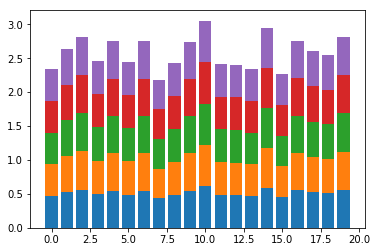

In [367]:
# For the first side
# 20 heroes

ind = np.arange(20)

bottom = np.zeros(20)

for i in range(5):
    height = np.array([pos_feature_winning[0][pos] for pos in range(20)])
    plt.bar(ind, height, bottom = bottom)
    bottom += height

In [444]:
np.logical_and((X == 1), (np.repeat(Y[:,np.newaxis], vocab.len, 1) == 0)).sum(axis = 0 )

array([ 408,  375,  388,  399,  273,  910,  527,  395,  359,  469,  286,
        348,  400,  329,  954,  257,  555,  222,  304,  362,  603, 1213,
        505,  676,  899,  513,  733,  428,  346,  340,  147,  146,  403,
        506,  636,  188,  549,  377,  244,  167,  206,  424,  100,  229,
        293,  405,  415,  504,  251,  286,  347,  506,  367,  351,  757,
        379,  345,  215,  280,  177,  913,  179,  241,  342,  483,  423,
        346,  244,  954,  524,  688,  294,  464,  437,  314,  289,  697,
        267,  271,  308,  286,  249,  751,  312,  202,  208,  293,  223,
        253,  317,  588,  201,  445,  170,  246,  483,  279])

In [445]:
np.logical_and((X == -1), (np.repeat(Y[:,np.newaxis], vocab.len, 1) == 1)).sum(axis = 0 )

array([ 362,  333,  359,  363,  245,  735,  472,  379,  277,  447,  248,
        337,  415,  301,  939,  222,  478,  198,  298,  347,  524, 1050,
        558,  611,  787,  441,  729,  398,  308,  329,  124,   93,  386,
        408,  506,  159,  449,  341,  234,  153,  210,  371,  107,  201,
        229,  421,  440,  463,  232,  300,  295,  444,  398,  383,  739,
        366,  326,  226,  243,  169,  813,  166,  252,  355,  435,  403,
        308,  249,  876,  490,  634,  278,  407,  394,  281,  232,  591,
        286,  244,  300,  244,  233,  684,  284,  177,  186,  289,  226,
        226,  301,  508,  195,  362,  182,  148,  464,  231])

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin

class ModifiedNaiveBayes(BaseEstimator, ClassifierMixin):
    def __init__(self):
        # for each feature, store a value corresponding to 
        self.f_scores = None
    
    def fit(self, X, Y, sample_weight = None):
        # We know that when a feature == 1, it belongs to first team
        # When the feature == -1, it belongs to the second team
        self.f_total = (X != 0).sum(axis = 0)
        
        Y_repeat = np.repeat(Y[:,np.newaxis], vocab.len, 1)
        
        self.f_win = np.logical_and(X == 1, Y_repeat == 0).sum(axis = 0 ) + np.logical_and(X == -1, Y_repeat == 1).sum(axis = 0 )
        
        self.f_scores = self.f_win / self.f_total
        
    def predict(self, X):
        # Here we will modify prediction according to our preference
        t  = np.repeat(self.f_scores[np.newaxis, :], len(X), 0)
        q = np.sum( t * X, axis = 1 )
        q = q < 0
        return np.sum(q[:, np.newaxis], axis = 1)

In [65]:
feature_total = defaultdict(int)
feature_win = defaultdict(int)
for i, match in enumerate(matches):
    win_team, loss_team, result = match
    
    if result == 2:
        win_team, loss_team = loss_team, win_team

    for v in win_team:
        feature_total[v] += 1
        feature_win[v] += 1
    for v in loss_team:
        feature_total[v] += 1

f_score = dict([(k, float(feature_win[k])/feature_total[k] ) for k in feature_total])

In [32]:
model = ModifiedNaiveBayes()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.597333333333


In [33]:
model.fit(X, Y)

In [178]:
# Add dimensions for head-to-head performance of the best heroes of both sides
X_numeric = np.zeros((X.shape[0], 13))
X_numeric_revert = np.zeros((X.shape[0], 13))

In [179]:
for i, x in enumerate(X):
    team_1 = np.argwhere(x == 1).flatten()
    team_2 = np.argwhere(x == -1).flatten()

    team_1 = sorted(team_1, key = lambda t : model.f_scores[t])
    team_2 = sorted(team_2, key = lambda t : model.f_scores[t])
    
    X_numeric[i][:5] = model.f_scores[team_1]
    X_numeric[i][5:10] = model.f_scores[team_2]
    
    X_numeric_revert[i][:5] = model.f_scores[team_2]
    X_numeric_revert[i][5:10] = model.f_scores[team_1]
    
    # Performance of two best heroes on two sides when they play along each other
    t1 = tuple(sorted(team_1[3:]))
    t2 = tuple(sorted(team_2[3:]))
    
    X_numeric[i][10] = double_same_win[t1] / double_same[t1]
    X_numeric[i][11] = double_same_win[t2] / double_same[t2]
    X_numeric_revert[i][10] = double_same_win[t2] / double_same[t2]
    X_numeric_revert[i][11] = double_same_win[t1] / double_same[t1]
    
    if team_1[4] < team_2[4]:
        t3 = (team_1[4], team_2[4])
    
        X_numeric[i][12] = double_diff_win[t3] / double_diff[t3]
        X_numeric_revert[i][12] = 1 - double_diff_win[t3] / double_diff[t3]
    else:
        t3 = (team_2[4], team_1[4])
        X_numeric[i][12] = 1 - double_diff_win[t3] / double_diff[t3]
        X_numeric_revert[i][12] = double_diff_win[t3] / double_diff[t3]

In [143]:
print (X_numeric.shape)

(15000, 13)


In [149]:
m = LogisticRegression()
results = cross_val_score(m, X_numeric[:, 10:], Y , cv=kfold)
print(results.mean())

0.6158


In [150]:
m.fit(X_numeric[:, 10:], Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [151]:
m.score(X_numeric[:, 10:], Y)

0.61619999999999997

In [152]:
m.intercept_

array([ 1.49010919])

In [153]:
m.coef_

array([[-4.29557372,  4.10156613, -2.93904037]])

In [106]:
m_2 = LogisticRegression()
results = cross_val_score(m_2, X_numeric[:,:10], Y , cv=kfold)
print(results.mean())

0.608933333333


In [111]:
m_2.fit(X_numeric[:,:10], Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [112]:
m_2.intercept_

array([ 0.24702304])

In [113]:
m_2.coef_

array([[-3.39906672, -3.53819079, -3.98052895, -3.75992271, -3.50958269,
         4.55141358,  2.86816211,  3.18571958,  3.73144632,  3.26923679]])

In [115]:
m_3 = LogisticRegression()
m_3.fit(X_numeric[:,list(range(10)) + [12]], Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [119]:
m_3.intercept_

array([ 0.18885693])

In [120]:
m_3.coef_

array([[-3.39687045, -3.54214475, -3.98701025, -3.76362845, -3.55188428,
         4.55107576,  2.86291   ,  3.18446881,  3.7271194 ,  3.22678909,
         0.22959604]])

In [156]:
X_numeric_revert = np.concatenate( [X_numeric[:, 5:10], X_numeric[:, :5]], axis = 1 )

In [180]:
X_sym = np.concatenate( [X_numeric, X_numeric_revert] )
print (X_sym.shape)

(30000, 13)


In [171]:
Y_revert = 1 - Y
Y_sym = np.concatenate([Y, Y_revert])

In [181]:
m_4 = LogisticRegression()
results = cross_val_score(m_4, X_sym, Y_sym , cv=kfold)
print(results.mean())

0.634666666667


In [185]:
m_4.fit(X_sym[:,:10], Y_sym)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [186]:
m_4.coef_

array([[-4.14632161, -3.44830095, -4.18099486, -4.0386094 , -3.50826214,
         4.14632162,  3.44830095,  4.18099486,  4.0386094 ,  3.50826215]])

In [187]:
m_4.intercept_

array([ -4.64119811e-09])